In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

def sigmoid (x):
    ''' Returns sigmoid of x '''
    return 1/(1 + np.exp(-x))     
def d_sigmoid(x): 
    ''' Returns derivative if sigmoid of x'''
    return x * (1 - x)            
def relu(x):
    """ Return x if x>0, else 0"""
    #return np.maximum(0,x)
    return x 

def d_relu(x):
    """ Return 1 if x >0, else 0 """
    x[x>0] = 1
    x[x<0] = 0
    #return x
    return 1 

In [3]:
epochs = 60000           # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

## XOR Data
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

BackProp 

In [4]:
# weights on layer inputs
w0 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
w1 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
 
for i in range(epochs):
    h = sigmoid(np.dot(x, w0))                   # hidden layer 
    y_ = sigmoid(np.dot(h, w1))                  # output layer 
    e = y - y_                                   # error 
    dy_ = e * d_sigmoid(y_)                      # delta output
    dh = dy_.dot(w1.T) * d_sigmoid(h)            # delta hidden
    w1 +=  h.T.dot(dy_)                          # update output layer weights
    w0 +=  x.T.dot(dh)                           # update hidden layer weights

print('Final error: ')
print(e)
print('Final y estimate: ')
print(np.round(y_, 2))                

Final error: 
[[-0.01296702]
 [ 0.00780226]
 [ 0.00780182]
 [-0.00193904]]
Final y estimate: 
[[ 0.01]
 [ 0.99]
 [ 0.99]
 [ 0.  ]]


Feedback Alignment

In [8]:
# weights on layer inputs
w0 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
w1 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

## fixed random feedback weights 
b0 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
b1 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

for i in range(epochs):
    h = sigmoid(np.dot(x, w0))                   # hidden layer 
    y_ = sigmoid(np.dot(h, w1))                  # output layer 
    e = y - y_                                   # error 
    
    dy_ = e * d_sigmoid(sigmoid(np.dot(h, b1)))                      # delta output
    dh =  dy_.dot(w1.T) * d_sigmoid(sigmoid(np.dot(x, b0))) 
    w1 +=  h.T.dot(dy_)                          # update output layer weights
    w0 +=  x.T.dot(dh)                           # update hidden layer weights

print('Final error: ')
print(e)
print('Final y estimate: ')
print(np.round(y_, 2))     

Final error: 
[[-0.0059945 ]
 [ 0.00667564]
 [ 0.00700805]
 [-0.00975766]]
Final y estimate: 
[[ 0.01]
 [ 0.99]
 [ 0.99]
 [ 0.01]]


Self Organizing Memory Network

In [ ]:
def run_network(v, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Plastic'):
    r = relu(v)
    stims = list()
    stims.append(np.dot(np.transpose(d), r)[0])
    for t in range(time):
        v = v*(1-dt) + dt*(np.dot(L,r))    ## update firing rates
        r = relu(v)
        stims.append(np.dot(np.transpose(d), r)[0])
        if(synapses=='Plastic'):
            drdv = d_relu(r)
            dsdt = np.vdot(d*drdv, (-v + np.dot(L,r)))  ## calculate error (ds/dt)
            L = L - 2*eta*dsdt*np.transpose(d)*drdv*np.transpose(r)
    return stims

n = 100 ## neurons
n_stim = 1 ## one scalar stimulus 
## randomly initialize network
v = np.random.randn(n, 1)       ## voltages 
r = relu(v)                     ## firing rates 
d = abs(np.random.randn(n, n_stim)) ## read out weights
L = np.random.randn(n, n)  ## connectivity 
L = np.divide(L, math.sqrt(n))  ## reduce eigenspectrum of L for simplicity
stims_plastic = run_network(v, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Plastic')
stims_constant = run_network(v, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Constant')            

plt.plot(list(range(len(stims_plastic))), stims_plastic, 'blue')
plt.plot(list(range(len(stims_constant))), stims_constant, 'red')
plt.show()
    

Three Factor Rules for Mackey Glass Chaotic Time Series

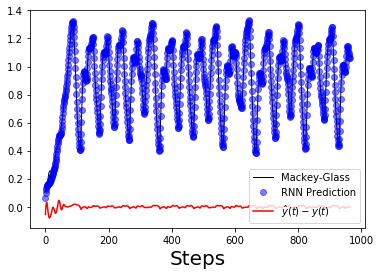

In [101]:
def MackeyGlass(time, r, d):
    y_x = np.array([0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485, 1.1482,
                    1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759])
    tau = len(y_x)
    b = .1
    c = .2 
    y = np.array(np.dot(np.transpose(r), d)[0])
    for i in range(1, len(y_x)):
        y = np.append(y, y[0] + (y_x[i] - y_x[0])) 
    MG = list()
    for t in range(tau, time-tau):
        yt = y[t-1] - b*y[t-1] + c*y[t-tau] / (1 + y[t-tau]**10)
        y= np.append(y, yt)
        MG.append(yt)
    return MG

np.random.seed(6)
n = 100
a = np.random.randn(n,1)  / 5
r = relu(a)
d = np.reshape(np.repeat(.01, n), (n,1)) 
dt = .1
eta = 1
time = 1000
MG = MackeyGlass(time, r, d)
y_s = list()
errors = list() 
for t in range(len(MG)):
    a = a*(1-dt) + dt*(np.dot(L,r))
    r = relu(a)
    y_ = np.dot(np.transpose(r), d)
    y_s.append(y_[0])
    drdt = d_relu(copy.deepcopy(a))
    error = y_ - MG[t]
    errors.append(error[0])
    dL = (np.repeat(np.dot(d,error),  n)).reshape(n, n) 
    dL = dL * 2 * eta * np.transpose(r) * drdt
    L = L - dL

x = list(range(len(MG)))
a, =plt.plot(x, MG, 'k',linewidth = 1, label='Mackey-Glass')
b,= plt.plot(x, y_s, 'o', color='blue', alpha = .5, linewidth = 1, label='RNN Prediction')
c, =plt.plot(x, errors, 'red', label=r'$\hat{y}(t) - y(t)$')
plt.title('')
plt.xlabel('Steps', size=20)
plt.legend(loc=4)
plt.show()
    

%%html
<img src = "img/RNN_MackeyGlass.pdf", width=500>

Now update the code so that it predicts the next 3 points